In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('/Users/celty/Desktop/S1/MBAN 6110/final/conversion_data.csv')

In [3]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


## <span style="color:#F0A6B3">DATA CLEANING</span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# This category is the same as index, therefore, it is not needed anymore.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

In [7]:
check_dp=df.duplicated().any().any()
if check_dp:
    print('True')
else:
    print('False')

# No duplicates.

False


In [8]:
check_na=df.isnull().any().any()
if check_na:
    print('True')
else:
    print('False')

# No null values.

False


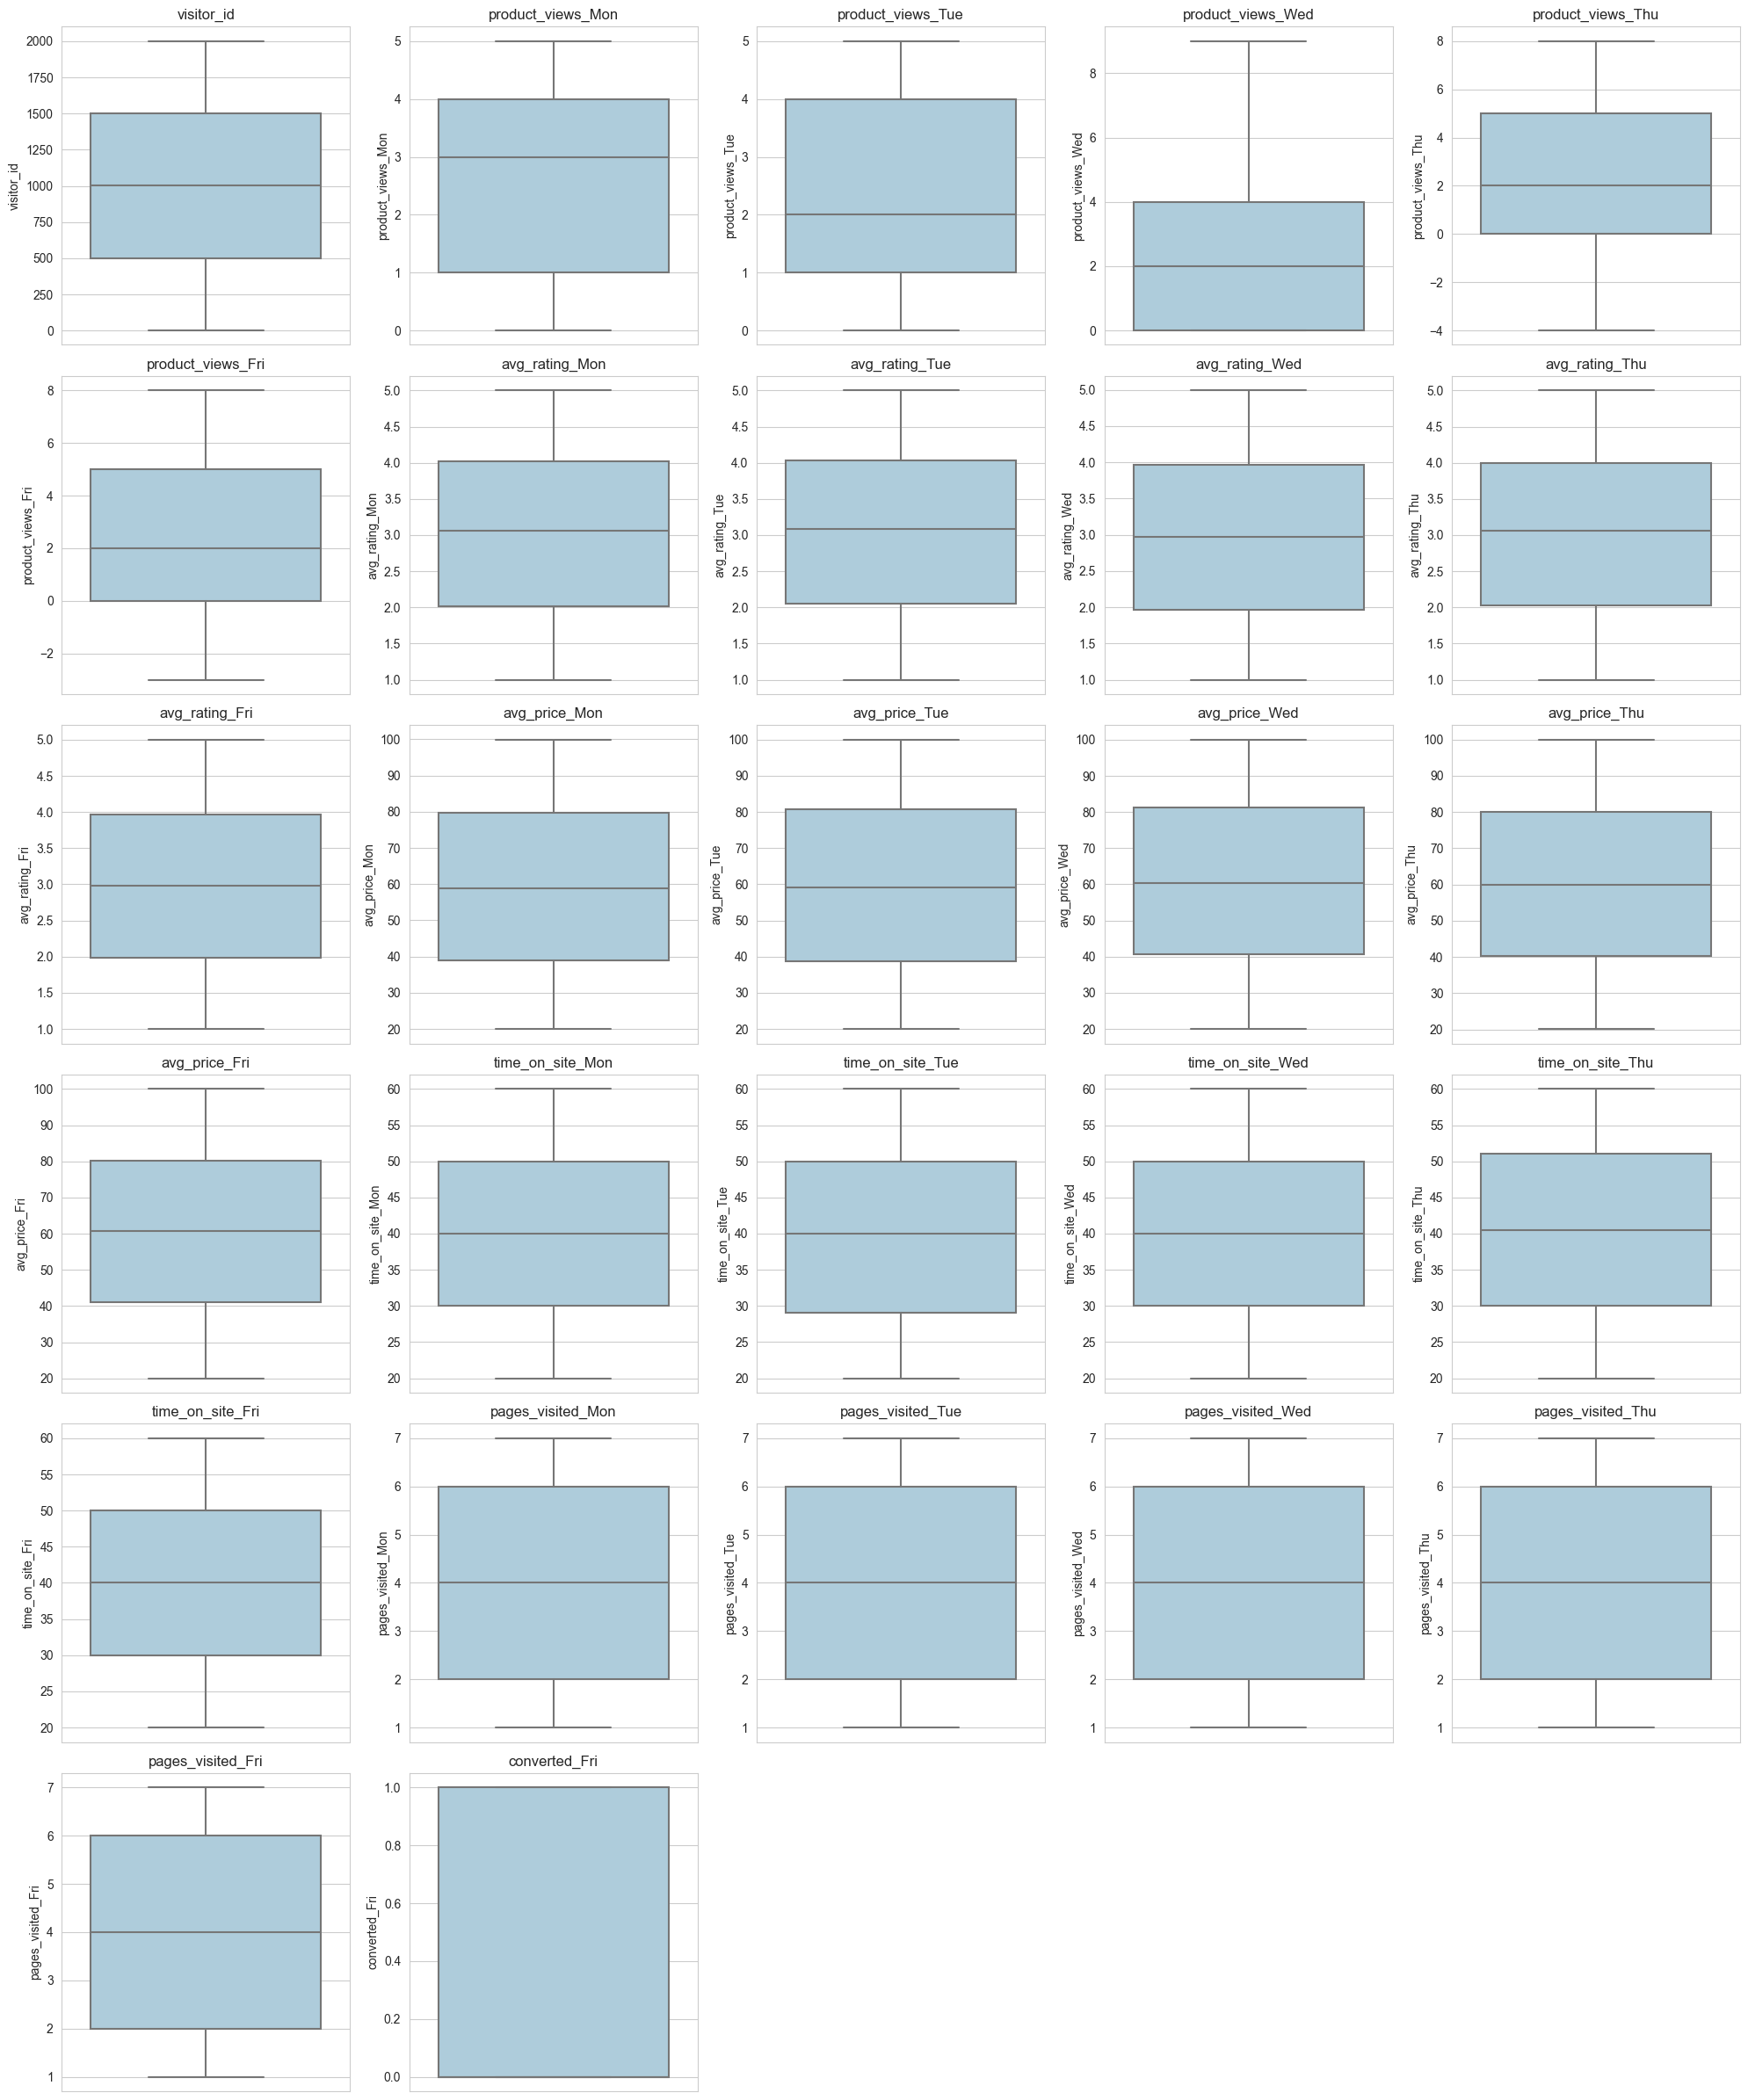

In [9]:
# Check Outliers
sns.set_style("whitegrid")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

n = len(numeric_cols)
ncols = 5
nrows = n // ncols + (1 if n % ncols else 0)

plt.figure(figsize=(20, nrows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(y=df[col],palette='Paired')
    plt.title(col)
    plt.tight_layout()

plt.show()

# No outliers.

In [10]:
# Check negative values that do not make sense.
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
rows_with_negative_values = numeric_cols[numeric_cols.lt(0).any(axis=1)]

In [11]:
rows_with_negative_values

,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
2,3,3,4,0,-3,5,3.26,4.79,3.12,2.58,...,34,22,34,31,1,3,3,2,3,1
17,18,4,1,0,-2,5,2.33,1.00,3.61,2.32,...,60,24,35,31,7,5,6,4,2,1
34,35,0,0,3,-2,5,2.13,1.62,2.29,3.12,...,39,32,60,53,1,7,2,5,7,1
35,36,4,3,4,4,-3,3.58,3.83,3.25,3.72,...,30,56,44,41,2,6,2,3,3,1
78,79,4,4,5,5,-1,4.06,4.36,4.89,2.07,...,26,26,43,38,6,1,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,1949,5,3,4,-2,3,4.56,1.19,2.63,1.72,...,23,28,48,38,6,7,3,5,7,1
1956,1957,3,1,2,-1,4,4.63,4.71,1.19,3.05,...,33,57,47,54,2,1,1,2,3,1
1965,1966,4,5,5,-1,5,2.38,3.41,2.77,2.81,...,34,55,49,60,4,5,4,4,3,1
1971,1972,5,5,4,-2,5,4.78,3.87,4.60,1.46,...,54,46,58,42,4,2,7,2,5,1


In [12]:
df = df.drop(rows_with_negative_values.index)

In [13]:
df.info()
# 7% of data are removed from the original dataset, which is acceptable.

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         1859 non-null   int64  
 1   visitor_location   1859 non-null   object 
 2   marketing_channel  1859 non-null   object 
 3   gender             1859 non-null   object 
 4   product_views_Mon  1859 non-null   int64  
 5   product_views_Tue  1859 non-null   int64  
 6   product_views_Wed  1859 non-null   int64  
 7   product_views_Thu  1859 non-null   int64  
 8   product_views_Fri  1859 non-null   int64  
 9   avg_rating_Mon     1859 non-null   float64
 10  avg_rating_Tue     1859 non-null   float64
 11  avg_rating_Wed     1859 non-null   float64
 12  avg_rating_Thu     1859 non-null   float64
 13  avg_rating_Fri     1859 non-null   float64
 14  avg_price_Mon      1859 non-null   float64
 15  avg_price_Tue      1859 non-null   float64
 16  avg_price_Wed      1859 non-n

In [14]:
df.select_dtypes(include=['object']).nunique()

# Visitor location, marketing channel, and gender categories are seemed normal.
# Data cleaning process completed.

visitor_location     5
marketing_channel    5
gender               2
dtype: int64

In [15]:
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,33,23,46,57,4,5,5,4,6,1
1,2,South America,organic,F,2,5,0,1,5,1.31,...,28,39,24,51,5,6,7,6,2,0
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,26,43,22,39,3,4,7,7,1,0
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,54,30,47,57,6,6,5,2,4,1
5,6,South America,organic,M,2,2,1,1,0,2.80,...,45,29,20,56,5,2,4,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,22,51,44,29,5,1,5,7,7,0
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,54,33,59,38,1,6,6,7,6,0
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,32,30,48,38,2,1,7,6,4,0
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,21,51,41,56,6,4,2,2,3,1


## <span style="color:#F0A6B3">EXPLANATORY DATA ANALYSIS</span>

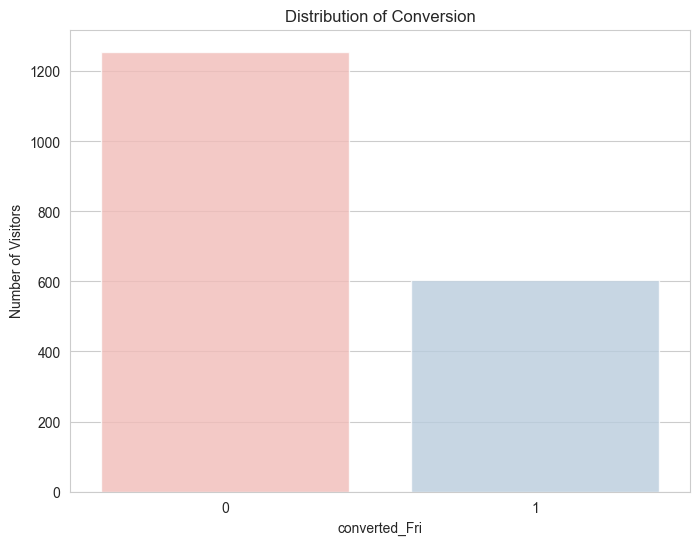

In [16]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='converted_Fri', data=df, palette='Pastel1',edgecolor='white', alpha=0.8)
plt.title('Distribution of Conversion')
plt.ylabel('Number of Visitors')
plt.show()

Visitors who converted are totally 600 people, but those who did not converted are more than 1200 people. This indeicates a customer conversion rate of 32.275%, which is not high.

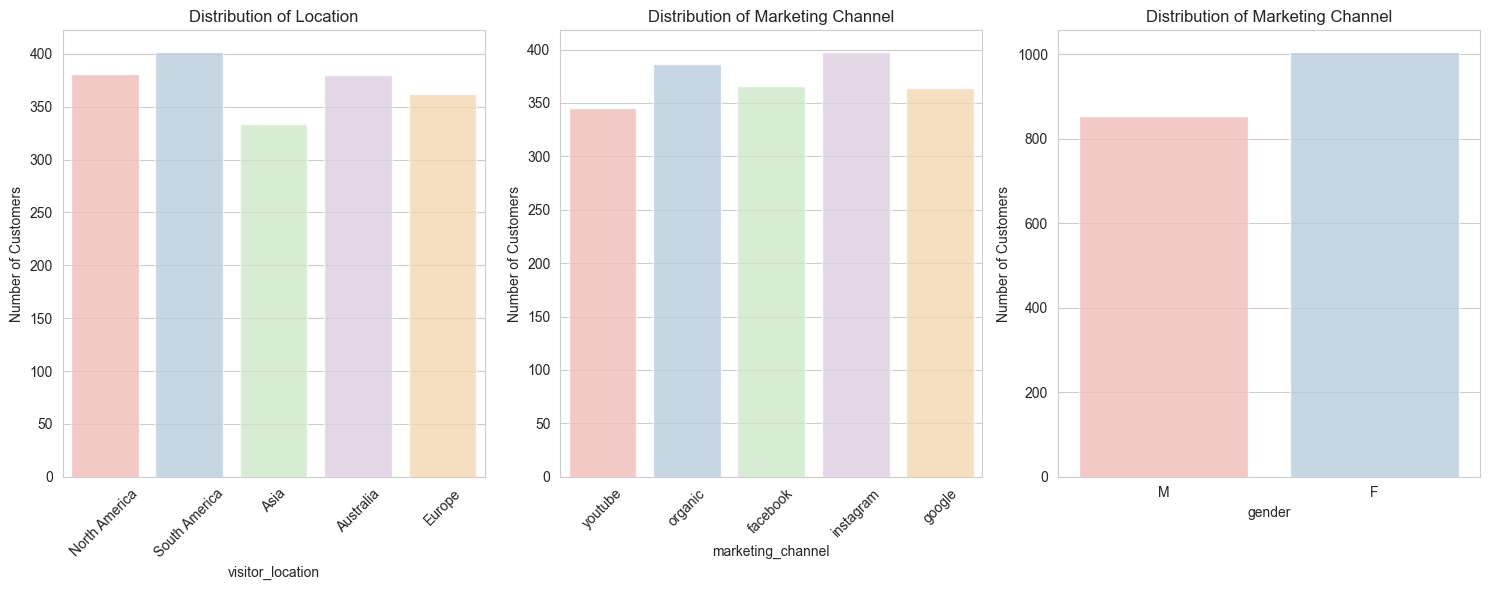

In [17]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.countplot(x='visitor_location', data=df, ax=ax[0],palette='Pastel1',edgecolor='white', alpha=0.8)
ax[0].set_title('Distribution of Location')
ax[0].set_ylabel('Number of Customers')
ax[0].tick_params(axis='x', rotation=45)
sns.countplot(x='marketing_channel', data=df, ax=ax[1],palette='Pastel1',edgecolor='white', alpha=0.8)
ax[1].set_title('Distribution of Marketing Channel')
ax[1].set_ylabel('Number of Customers')
ax[1].tick_params(axis='x', rotation=45)
sns.countplot(x='gender', data=df, ax=ax[2],palette='Pastel1',edgecolor='white', alpha=0.8)
ax[2].set_title('Distribution of Marketing Channel')
ax[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

South America visitors are the largest segment of the website visitor, followed by North America, Astralia, Europe, and Asia. 

Instagram has the most marketing influence than Organic, then the influence of Facebook is similiar to Google, followed by the least influence of Youtube.

Female visitors are more than Male visitors.

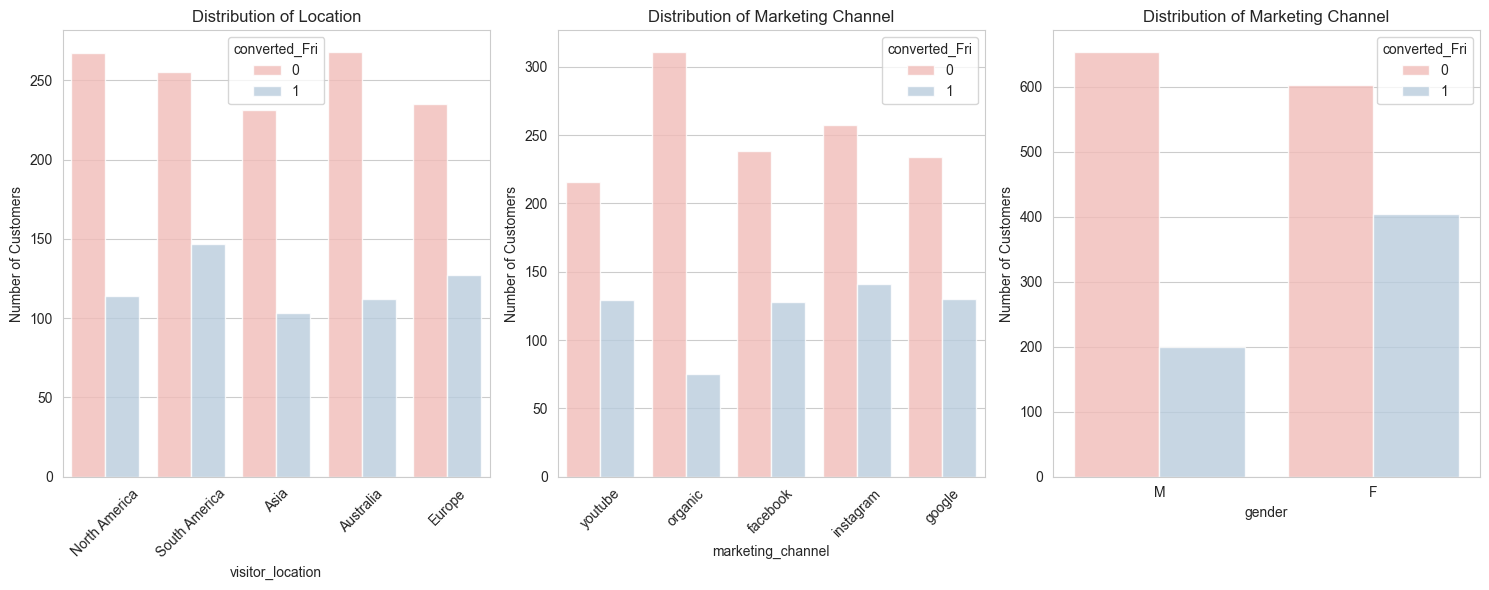

In [18]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
sns.countplot(x='visitor_location', data=df, ax=ax[0],palette='Pastel1',edgecolor='white', alpha=0.8,hue=df['converted_Fri'])
ax[0].set_title('Distribution of Location')
ax[0].set_ylabel('Number of Customers')
ax[0].tick_params(axis='x', rotation=45)
sns.countplot(x='marketing_channel', data=df, ax=ax[1],palette='Pastel1',edgecolor='white', alpha=0.8,hue=df['converted_Fri'])
ax[1].set_title('Distribution of Marketing Channel')
ax[1].set_ylabel('Number of Customers')
ax[1].tick_params(axis='x', rotation=45)
sns.countplot(x='gender', data=df, ax=ax[2],palette='Pastel1',edgecolor='white', alpha=0.8,hue=df['converted_Fri'])
ax[2].set_title('Distribution of Marketing Channel')
ax[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

Switch to the distribution of conversion by the three factors.

South America has the most visitors, in term that also has the most converted visitors. However, Australia has the least converted visitors compared to their good performance in total visitors. 

Visitors who are from Instagram converted the most to the buyers, but those who come from Organic Channel remained the most as visitors (not buying anything).

Female visitors are more likely to convert into buyers but male visitors would like to browse items more.

In [19]:
# Change the column names for further use.
df = df.rename(columns={'product_views_Mon': 'product_views_1', 'product_views_Tue': 'product_views_2','product_views_Wed': 'product_views_3','product_views_Thu': 'product_views_4','product_views_Fri': 'product_views_5'})
df = df.rename(columns={'avg_rating_Mon': 'avg_rating_1', 'avg_rating_Tue': 'avg_rating_2','avg_rating_Wed': 'avg_rating_3','avg_rating_Thu': 'avg_rating_4','avg_rating_Fri': 'avg_rating_5'})
df = df.rename(columns={'avg_price_Mon': 'avg_price_1', 'avg_price_Tue': 'avg_price_2','avg_price_Wed': 'avg_price_3','avg_price_Thu': 'avg_price_4','avg_price_Fri': 'avg_price_5'})
df = df.rename(columns={'time_on_site_Mon': 'time_on_site_1', 'time_on_site_Tue': 'time_on_site_2','time_on_site_Wed': 'time_on_site_3','time_on_site_Thu': 'time_on_site_4','time_on_site_Fri': 'time_on_site_5'})
df = df.rename(columns={'pages_visited_Mon': 'pages_visited_1', 'pages_visited_Tue': 'pages_visited_2','pages_visited_Wed': 'pages_visited_3','pages_visited_Thu': 'pages_visited_4','pages_visited_Fri': 'pages_visited_5'})

/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_70224/4058621914.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_70224/4058621914.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_70224/4058621914.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_70224/4058621914.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
/var/folders/05/d9ht8d1s3rs1ny1n4s1z1_zc0000gn/T/ipykernel_70224/4058621914.py:51: UserWarning: FixedFormatter should on

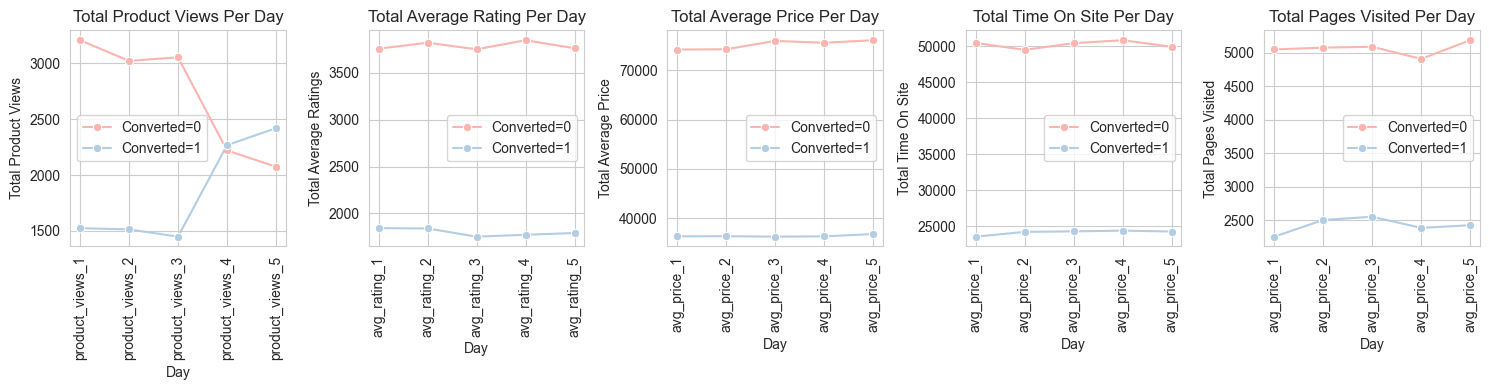

In [20]:
product_views_cvt_0 = df[df['converted_Fri'] == 0][[f'product_views_{i}' for i in range(1, 6)]].sum()
product_views_cvt_1 = df[df['converted_Fri'] == 1][[f'product_views_{i}' for i in range(1, 6)]].sum()

avg_rating_cvt_0 = df[df['converted_Fri'] == 0][[f'avg_rating_{i}' for i in range(1, 6)]].sum()
avg_rating_cvt_1 = df[df['converted_Fri'] == 1][[f'avg_rating_{i}' for i in range(1, 6)]].sum()

avg_price_cvt_0 = df[df['converted_Fri'] == 0][[f'avg_price_{i}' for i in range(1, 6)]].sum()
avg_price_cvt_1 = df[df['converted_Fri'] == 1][[f'avg_price_{i}' for i in range(1, 6)]].sum()

time_on_site_cvt_0 = df[df['converted_Fri'] == 0][[f'time_on_site_{i}' for i in range(1, 6)]].sum()
time_on_site_cvt_1 = df[df['converted_Fri'] == 1][[f'time_on_site_{i}' for i in range(1, 6)]].sum()

pages_visited_cvt_0 = df[df['converted_Fri'] == 0][[f'pages_visited_{i}' for i in range(1, 6)]].sum()
pages_visited_cvt_1 = df[df['converted_Fri'] == 1][[f'pages_visited_{i}' for i in range(1, 6)]].sum()

fig, ax = plt.subplots(1, 5, figsize=(15, 4))

sns.lineplot(x=product_views_cvt_0.index, y=product_views_cvt_0.values, ax=ax[0], marker='o', label='Converted=0',color='#fbb4ae')
sns.lineplot(x=product_views_cvt_1.index, y=product_views_cvt_1.values, ax=ax[0], marker='o', label='Converted=1',color='#b3cde3')
ax[0].set_title('Total Product Views Per Day')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Total Product Views')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.lineplot(x=avg_rating_cvt_0.index, y=avg_rating_cvt_0.values, ax=ax[1], marker='o', label='Converted=0',color='#fbb4ae')
sns.lineplot(x=avg_rating_cvt_1.index, y=avg_rating_cvt_1.values, ax=ax[1], marker='o', label='Converted=1',color='#b3cde3')
ax[1].set_title('Total Average Rating Per Day')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Total Average Ratings')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

sns.lineplot(x=avg_price_cvt_0.index, y=avg_price_cvt_0.values, ax=ax[2], marker='o', label='Converted=0',color='#fbb4ae')
sns.lineplot(x=avg_price_cvt_1.index, y=avg_price_cvt_1.values, ax=ax[2], marker='o', label='Converted=1',color='#b3cde3')
ax[2].set_title('Total Average Price Per Day')
ax[2].set_xlabel('Day')
ax[2].set_ylabel('Total Average Price')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

sns.lineplot(x=time_on_site_cvt_0.index, y=time_on_site_cvt_0.values, ax=ax[3], marker='o', label='Converted=0',color='#fbb4ae')
sns.lineplot(x=time_on_site_cvt_1.index, y=time_on_site_cvt_1.values, ax=ax[3], marker='o', label='Converted=1',color='#b3cde3')
ax[3].set_title('Total Time On Site Per Day')
ax[3].set_xlabel('Day')
ax[3].set_ylabel('Total Time On Site')
ax[3].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

sns.lineplot(x=pages_visited_cvt_0.index, y=pages_visited_cvt_0.values, ax=ax[4], marker='o', label='Converted=0',color='#fbb4ae')
sns.lineplot(x=pages_visited_cvt_1.index, y=pages_visited_cvt_1.values, ax=ax[4], marker='o', label='Converted=1',color='#b3cde3')
ax[4].set_title('Total Pages Visited Per Day')
ax[4].set_xlabel('Day')
ax[4].set_ylabel('Total Pages Visited')
ax[4].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

The five graph above indicates that converted customers may increasingly view more products, browse more lower ratings products, look at lower prices of products, have less time on site, and have fewer pages visited than unconverted visitors. 

However,unconverted visitors are more likely to spend more time to visit more pages on site, browse products with higher prices and higher ratings, but their views are reducing in the time series. 

## <span style="color:#F0A6B3">FEATURE ENGINEERING</span>

In [21]:
df['product_views_oneweek'] = df[[f'product_views_{i}' for i in range(1, 6)]].sum(axis=1)
df['avg_rating_oneweek'] = df[[f'avg_rating_{i}' for i in range(1, 6)]].sum(axis=1)
df['avg_price_oneweek'] = df[[f'avg_price_{i}' for i in range(1, 6)]].sum(axis=1)
df['time_on_site_oneweek'] = df[[f'time_on_site_{i}' for i in range(1, 6)]].sum(axis=1)
df['pages_visited_oneweek'] = df[[f'pages_visited_{i}' for i in range(1, 6)]].sum(axis=1)
# Product views, average ratings on products, average price of products viewed, time spent on the website, and number of pages visited are added in total for easily check the pattern in a week unit.

In [22]:
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_1,product_views_2,product_views_3,product_views_4,product_views_5,avg_rating_1,...,pages_visited_2,pages_visited_3,pages_visited_4,pages_visited_5,converted_Fri,product_views_oneweek,avg_rating_oneweek,avg_price_oneweek,time_on_site_oneweek,pages_visited_oneweek
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,5,5,4,6,1,14,15.67,273.69,216,24
1,2,South America,organic,F,2,5,0,1,5,1.31,...,6,7,6,2,0,13,10.34,357.16,166,26
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,4,7,7,1,0,6,16.50,280.24,186,22
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,6,5,2,4,1,13,11.82,232.21,223,23
5,6,South America,organic,M,2,2,1,1,0,2.80,...,2,4,5,5,0,6,18.00,406.32,199,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,1,5,7,7,0,9,15.04,286.30,178,25
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,6,6,7,6,0,8,9.29,228.51,228,26
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,1,7,6,4,0,13,16.40,262.72,174,20
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,4,2,2,3,1,16,18.31,258.76,189,17


In [23]:
df = pd.get_dummies(df, columns=['marketing_channel', 'gender','visitor_location'],dtype='int', drop_first=True)
# Create dummy variables for future modelling.

In [24]:
df.columns

Index(['visitor_id', 'product_views_1', 'product_views_2', 'product_views_3',
       'product_views_4', 'product_views_5', 'avg_rating_1', 'avg_rating_2',
       'avg_rating_3', 'avg_rating_4', 'avg_rating_5', 'avg_price_1',
       'avg_price_2', 'avg_price_3', 'avg_price_4', 'avg_price_5',
       'time_on_site_1', 'time_on_site_2', 'time_on_site_3', 'time_on_site_4',
       'time_on_site_5', 'pages_visited_1', 'pages_visited_2',
       'pages_visited_3', 'pages_visited_4', 'pages_visited_5',
       'converted_Fri', 'product_views_oneweek', 'avg_rating_oneweek',
       'avg_price_oneweek', 'time_on_site_oneweek', 'pages_visited_oneweek',
       'marketing_channel_google', 'marketing_channel_instagram',
       'marketing_channel_organic', 'marketing_channel_youtube', 'gender_M',
       'visitor_location_Australia', 'visitor_location_Europe',
       'visitor_location_North America', 'visitor_location_South America'],
      dtype='object')

## <span style="color:#F0A6B3">MODELLING</span>

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score, confusion_matrix, precision_score

In [71]:
# Splitting the data into train and test sets

X = df.drop(['visitor_id', 'converted_Fri'], axis=1)
y = df['converted_Fri']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4321)

In [72]:
# Try the five models to compare there performance.
log = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

In [73]:
log.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
dt.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [74]:
pred_l = log.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)
pred_dt = dt.predict(X_test)

In [75]:
print(recall_score(pred_l, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))
print(recall_score(pred_dt, y_test))

0.625
0.3424657534246575
0.0
0.75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree model has the highest recall score, and Naive bayes model is the second best model for recall prediction.

In [76]:
avg_f1_scores = {}

# Execution for each model.
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Perform 10-fold cross-validation and calculate average F1 scores.
for name, model in models.items():
    f1_results = cross_val_score(model, X_train, y_train, cv=10, scoring=make_scorer(f1_score), n_jobs=-1)
    avg_f1_scores[name] = f1_results.mean()

avg_f1_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

{'Logistic Regression': 0.680737989002891,
 'Naive Bayes': 0.7454089210417225,
 'KNN': 0.28470057970057966,
 'SVM': 0.0,
 'Decision Tree': 0.7352766660127187}

After done the five models and having them done the cross validation 10 times, it indicates that Decision Tree model has the highest average F1 score, followed by Naive Bayes model, and Logistic Regression model. 

Therefore, the Decision Tree model will be the ideal one to do the prediction.

In [77]:
# Hyperparameter tuning
# select parameters
params_dt = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

# Define the models
dt = DecisionTreeClassifier()

randomsearch_dt = RandomizedSearchCV(dt, params_dt, cv=4, n_iter = 50, scoring='recall')

randomsearch_dt.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for NB - randomsearch: ", randomsearch_dt.best_params_)

Best parameters for NB - randomsearch:  {'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}


In [78]:
# Apply the best parameters
dt_best = DecisionTreeClassifier(**randomsearch_dt.best_params_)

# Perform cross-validation
cv_scores_dt = cross_val_score(dt_best, X_train, y_train, cv=5, scoring='recall')

print("Cross-validation scores for Naive Bayes: ", cv_scores_dt)

# Fit the models with the best parameters
dt_best.fit(X_train, y_train)

# Evaluate on the test set
y_pred_dt = dt_best.predict(X_test)

print("Test accuracy for Decision Tree: ", accuracy_score(y_test, y_pred_dt))

Cross-validation scores for Naive Bayes:  [0.84848485 0.87878788 0.79591837 0.7755102  0.74489796]
Test accuracy for Decision Tree:  0.8763440860215054


In [79]:
# Compute metrics
print("Decision Tree Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_dt))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("F1 Score: ", f1_score(y_test, y_pred_dt))

Decision Tree Metrics: 
Confusion Matrix:  [[236  25]
 [ 21  90]]
Accuracy:  0.8763440860215054
Precision:  0.782608695652174
Recall:  0.8108108108108109
F1 Score:  0.7964601769911505


In [80]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
# Get feature importances
feature_importances = dt.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df

,Feature,Importance
4,product_views_5,0.467011
3,product_views_4,0.158411
2,product_views_3,0.048110
7,avg_rating_3,0.031694
19,time_on_site_5,0.023556
5,avg_rating_1,0.021717
9,avg_rating_5,0.021708
15,time_on_site_1,0.018761
10,avg_price_1,0.016654
12,avg_price_3,0.015993


The ranking of feature importance indicates that the number of products the visitor viewed on Wednesdau, Thursday and Friday, the average rating of products viewed on Monday and Wednesday are main attributes that will influence the conversion rate.

Our business problem is making sure we find all the customers who are likely to convert. A high recall means that the model misses very few customers in predicting conversion. This can apply in the case of the strategy of increasing conversion rate.

Increasingly customer views on more products, pushing more products with lower prices, decreasing their time on site such as one-click-purchase, and having fewer pages visited by personal recommendations will be good choices for increasing the conversion rate.